# 회귀

- 머신러닝 -> 지도학습 -> 회귀
- 지도학습 상에서 정답이 카테고리화 되면 분류, 아니면 회귀로 간다. (수치)
 - 부동산 데이터 정보를 가지고 집값 예측 (수치, 딱 떨어진 것이 아닌 추정치)
- (두 OR 여러개) 변수 사이에 관계를 설명 할 수 있는 식을 만든다면, -> 새로운 데이터를 넣어서 그 결과를 예측할 수 있다!

- 종류
    - 상관분석(독립변수들간의 (다중공선성 이라는 문제를 야기시키고, 분석의 신뢰성을 저하시키는 원인), **독립변수와 종속변수 간에**), 인과관계, 가설검증, 아메바분석 등등...
    - **단순 선형 회귀 분석**
    - **다중 회귀(중회귀) 분석**
    - 로지스틱 회귀

- 기타
    - 라쏘 회귀
    - 릿지 회귀 등등

## 단순 선형 회귀 분석

### 연구목표

1. 목표1
    - 알코올(독립변수)이 와인품질(종속변수)에 미치는 영향, 상관관계 분석, 두 변수 간의 관계식을 구현
    - 그 영향을 수치화
    - 관계를 해석
2. 목표2
    - 개별 독립 변수들와 와인 품질에 대해서 1:1 대응하여 어떤 독립변수가 품질에 영향을 미치는지 분석

#### 데이터 준비

In [1]:
import numpy as np
import pandas as pd

# 파이썬의 통계 분석을 위해 편리한 도구를 제공하는 패키지
import statsmodels.api as sm
"""
R 모형들 중 
    - 검정, 추정, 회귀분석, 시계열 분석 등등 ....
    - R스타일로 제공해준다. 방법론은 동일하다.
"""
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# csv -> df
wine_qu = pd.read_csv('./res/winequality-red.csv', sep=';')
wine_qu.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_qu.shape

(1599, 12)

In [6]:
# 품질에 대해서 3이 좋은것인지? 8이 좋은것인지? 3-8 다인지? 이 값은 연속적인지? 단지 구분하는 것인지?
# 인사이트 분석, 공부를 통해서 데이터에 대한 기본적인 정보를 가지고 있어야한다.
wine_qu.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

- 컬럼 
  - 독립변수 
    - "고정 산도"; "휘발성 산도"; "구연산"; "잔류 당"; "염화물"; "유리 이산화황"; "총 이산화황"; "밀도"; "pH"; "황산염"; **"알코올"**; 
  - 종속변수
    - <font color='color:red;'><b>"품질"</b></font>

In [8]:
wine_qu.columns
# 컬럼명에 공백이 존재해서 불편할 수 도 있다 -> 공백 처리, 컬럼명을 명확하게 조정해서 사용

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### 기초 용어 이해

- 단순 선형 회귀 분석
- 명제
    - 인구가 X명인데, 필요한 전력량은? Y
    - 흡연하는 양이 X일 때, 폐암 발생률은? Y
    - 키가 X인데, 몸무게는? Y
- 식
  - y(종속변수) = ⍺(y절편, 상수, 편향) + β(기울기)x(독립변수)
  - 2개의 요소를 설명할 수 있는 식을 구하시오
- 용어
  - 최소 제곱(최소 제곱법, 최소 자승법)
    - 예측값 y`, 실제값 y(확률변수) 사이의 수직거리 -> 오차 
    - 오차를 제곱하여 총합을 구한 것, 이 값을 최소로 되게 조절하는 것이 목표(⍺, β) 
  - 잔차(확률오차)
    - 예측값 y`, 실제값 y(확률변수) 사이의 편차(관측값, 평균의 차이, y의 평균을 활용)
    - 제곱해서 합한다
    - 이 값을 최소로 하게끔 조정한다(⍺, β)

  - 평가
  - 상관분석 
    - 두 변수간의 관계 분석 지표 

#### statsmodels을 이용한 분석

In [10]:
# sm 
# 알코올 값 확인
# 알코올 값은 연속적인 수치로 보인다.
wine_qu['alcohol'][:3], wine_qu['alcohol'][-3:], np.max(wine_qu['alcohol']), np.min(wine_qu['alcohol'])
# 알코올 최댓값 : 14.9
# 알코올 최솟값 : 8.4

(0    9.4
 1    9.8
 2    9.8
 Name: alcohol, dtype: float64,
 1596    11.0
 1597    10.2
 1598    11.0
 Name: alcohol, dtype: float64,
 14.9,
 8.4)

In [11]:
wine_qu['quality'][:3], wine_qu['quality'][-3:], np.max(wine_qu['quality']), np.min(wine_qu['quality'])
# 품질 최대 8, 품질 최소 3 

(0    5
 1    5
 2    5
 Name: quality, dtype: int64,
 1596    6
 1597    5
 1598    6
 Name: quality, dtype: int64,
 8,
 3)

In [12]:
# OLS툴은 독립변수를 넣을 때, API 자체적으로 계산을 위해 상수를 추가하라고 요구하고 있다.
sm.add_constant(wine_qu['alcohol'])
# wine_qu['alcohol']
# OLS가 형식을 맞춰달라고 요청한 것이므로 의미를 둘 필요 없다.

,const,alcohol
0,1.0,9.4
1,1.0,9.8
2,1.0,9.8
3,1.0,9.8
4,1.0,9.4
...,...,...
1594,1.0,10.5
1595,1.0,11.2
1596,1.0,11.0
1597,1.0,10.2


In [13]:
# sm에 적용해서 분석 결과 확인
"""
OLS : Ordinary Least Squares : 최소제곱법을 이용하여, 데이터를 학습, 방정식을 생성, 예측을 구축한다. 
"""
model = sm.OLS(wine_qu['quality'],sm.add_constant(wine_qu['alcohol']))

In [14]:
# 학습
result = model.fit()

In [15]:
# 평가
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     468.3
Date:                Mon, 12 Jul 2021   Prob (F-statistic):           2.83e-91
Time:                        15:37:30   Log-Likelihood:                -1721.1
No. Observations:                1599   AIC:                             3446.
Df Residuals:                    1597   BIC:                             3457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8750      0.175     10.732      0.0

- 해석
    - coef(model) -> 방정식에 대한 지표 
    - Method -> Least Squares (최소제곱법)을 사용
    - const
        - y절편, 상수, 편향
        - 원리 : 이 값을 조정(상향, 하향) 해서 -> 최소제곱법으로 계산하여 이 값의 결과가 최소가 되게 조정하는 성분 (미세조정 : 최소제곱법으로)
        - 현재 레포트 상에는 1.8750
    - alcohol
        - 기울기, 독립변수 명으로 보이지만 의미
        - 현재 레포트 상에는 0.3608
    - 방정식
        - y = 1.8750 + 0.3609*x
    - R-squared 
        - R^2 
        - 결정계수
        - 현재값 0.227 이므로, 알콜이 레드와인품질에 대해서 22.7%를 설명하고 있다.
        - 일반적으로는, 0.7 이상 (1에 가까울수록) 높은 상관관계를 보인다. -> 지대한 영향을 미치고 있다 라고 설명할 수 있다.
        - 해당 값은 내부적으로 합산으로 계산
        - Adj.R-squared :
            - 조정된 R^2 
            - 내부적으로 평균으로 계산
            - 0.226
        - P > |t|
            - P-Value(유의확률)
            - 통상, 통계에서 가설 검정 분야에 사용하는 지표
            - ex) 0.05 or 0.01 보다 P-Value가 작으면 귀무가설을 기각한다라는 표현 
            - 현재값 const 0.0, 알콜 0.0
            - 기준은 0.01 이나 0.05 라면, 귀무가설 기각
            - 현재 귀무가설 : 알콜은 와인품질에 영향을 미친다.
            - 결론 : 귀무가설이 기각되었으므로, 알콜은 와인 품질에 영향을 미치지 않는다. 
        - VIF(Variance Inflation Factor)
            - 다중공선성을 판단하는 지표
            - 다중 회귀에서 의미를 가진다.
            - 1/(1-R^2)으로 계산됨
                - 독립변수들 사이에 상관관계가 존재하는 경우
                - 이런 값이 0.9 이상으로 높은 상관관계를 가지면 
                - 다중공선성이 존재한다라고 판단 -> 아무리 예측 결과가 좋아도 신뢰성이 떨어진다. 
                - 10 이상의 값이면 다중공선성이 존재한다라고 판단

In [16]:
# 상수(y절편), 기울기
result.params

const      1.874975
alcohol    0.360842
dtype: float64

In [17]:
a, b = result.params
a, b

(1.8749748869971525, 0.36084176533503476)

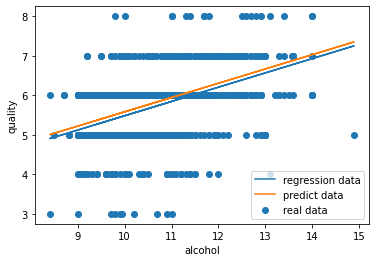

In [18]:
# 시각화
# 1. 데이터의 분포도를 그린다.
plt.scatter(wine_qu['alcohol'],wine_qu['quality'], label='real data')

# 2. 알콜 데이터를 넣어서 방정식을 활용하여 y를 구성
plt.plot(wine_qu['alcohol'], (a+b*wine_qu['alcohol']), label='regression data')

# 3. 예측 결과를 그린다. + 편향값을 입력(0.1)
# 0.1을 제시한 것은 2번과 겹치기 때문에 구분하려고 값을 올렸다.
plt.plot(wine_qu['alcohol'], (result.predict() + 0.1), label='predict data')

# x. 보여라
plt.legend()
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.show()
# 약한 상관관계 (0.5 기준)

In [19]:
# R^2
result.rsquared, result.rsquared_adj

(0.22673436811275482, 0.22625016921990115)

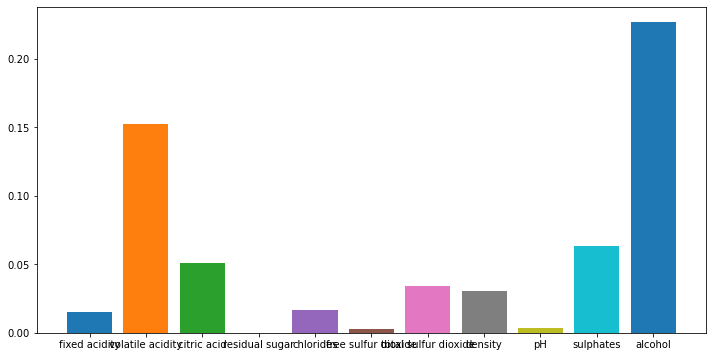

In [21]:
# 다른 변수들과 품질에 대해 1대1로 선형회귀를 분석한 후 R제곱을 기준으로 바차트를 그리시오 (수직)
# x축 : 독립변수명, y축 : R^2
# 모양 
plt.figure(figsize=(12,6))
for column in wine_qu.columns[:-1] : 
    # 1. 모델 생성 
    model = sm.OLS(wine_qu['quality'], sm.add_constant(wine_qu[column]))
    # 2. 학습
    result = model.fit()
    # 3. 플로팅
    plt.bar(column, result.rsquared, label=column)
# 보여라
plt.show()
# 알콜이 가장 큰 상관관계를 가졌다. 그러나, 이것이 상관성이 높다는 뜻은 아니다. 
# 이것은 곧, 1개의 독립변수 만으로는 종속변수를 설명할수 없다는 것
# 다중 회귀로 이동을 해야겠다 (여러개의 독립변수의 비율이 적절히 반영되서, 품질을 설명할수 있다면)

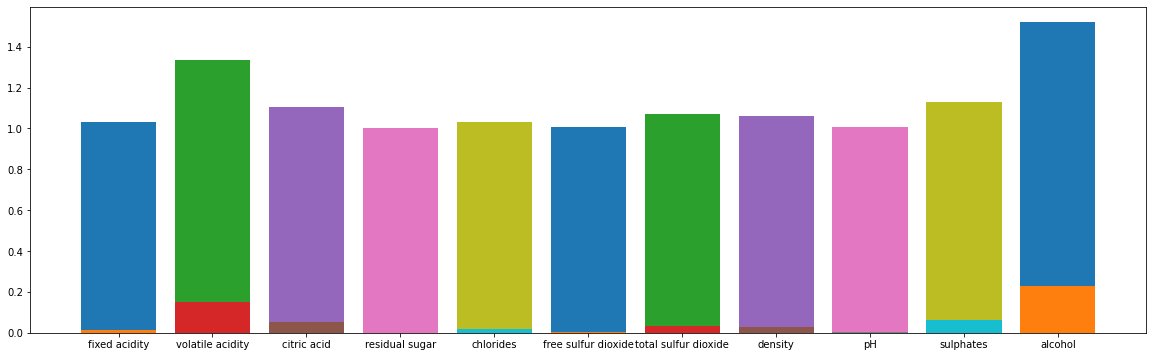

In [22]:
# 옵션, VIF를 같이 표현해라.
# 여기서는 단순 선형이라 필요없지만, 굳이...
# 이렇게 넣으면 된다.
plt.figure(figsize=(20,6))
for column in wine_qu.columns[:-1] :
    model = sm.OLS(wine_qu['quality'], sm.add_constant(wine_qu[column]))
    result = model.fit()
    vif = 1/(1-result.rsquared)
    plt.bar(column, vif, label=column, bottom = result.rsquared)
    plt.bar(column, result.rsquared, label=column)
    
plt.show()

#### 직접 low level 구현하여 분석

In [23]:
# 데이터를 분할해서 진행
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [24]:
# 데이터 분할) 머신러닝 : 75:25, 통계모델 : 7:3
# X재료가 1D라도 분할 처리는 된다. 
X_train, X_test, y_train, y_test = train_test_split(wine_qu['alcohol'],wine_qu['quality'], train_size=0.7, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1119,), (480,), (1119,), (480,))

In [25]:
X_train = pd.DataFrame(X_train) 
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [26]:
X_train.head()

,alcohol
925,11.0
363,10.2
906,11.0
426,11.4
1251,9.8


- 회귀 모델의 계수(a,b)를 계산하기 위해서 진행

In [27]:
# 평균 -> 소수점 2자리 까지
alcohol_mean = round(np.mean(X_train['alcohol']),2)
quality_mean = round(np.mean(y_train['quality']),2)
alcohol_mean, quality_mean

(10.42, 5.62)

In [28]:
"""
분산
    - variance
    - 관측값에서 평균을 뺀 값을 제곱하여, 모두 더한다. 추후 전체갯수로 나눠서 구함
    - 데이터가 기댓값에서 얼마나 떨어져 있는지, 분포하는지 가늠하는 수치
    - sum((개별값 - 개별값의 평균)^2) / 전체 갯수
"""
# 소수점 둘째 자리까지
# alcohol 데이터의 분산(독립변수의 분산) 
alcohol_variance = round(np.var(X_train['alcohol']),2)
# quality 데이터의 분산(종속변수의 분산)
quality_variance = round(np.var(y_train['quality']),2)

alcohol_variance, quality_variance

(1.12, 0.66)

In [30]:
X_train['alcohol']

925     11.0
363     10.2
906     11.0
426     11.4
1251     9.8
        ... 
1130    10.4
1294    10.9
860      9.5
1459    11.9
1126    13.5
Name: alcohol, Length: 1119, dtype: float64

In [31]:
np.var(X_train['alcohol'])

1.122069106927944

In [32]:
np.mean((X_train['alcohol']-alcohol_mean)**2)

1.1220761989871872

In [33]:
alcohol_variance

1.12

In [35]:
alcohol_variance = round( ((sum((X_train['alcohol'] - alcohol_mean)**2))/(len(X_train))),2)

In [36]:
alcohol_variance

1.12

In [37]:
quality_variance=round( ((sum((y_train['quality'] - quality_mean)**2))/(len(y_train))),2)
quality_variance

0.66

In [42]:
# 공분산 : covariance
# 2개의 변수 중에 하나의 값이 상승하면, 다른 값도 상승하는가? -> 상승한다. 공분산은 양수이다.
# 2개의 변수 중에 하나의 값이 하락하면, 다른 값도 하락하는가? -> 하락한다. 공분산은 음수이다.

# ((알콜의 개별값 - 알콜평균)*(품질의 개별값 - 품질평균)) 평균, 소숫점 둘째 자리
# 공분산은 상관성에 영향을 미치는 요소, 부호(양의방향, 음의방향)
covariance = round(np.mean((X_train['alcohol']-alcohol_mean)*(y_train['quality']-quality_mean)),2)
covariance

0.42

In [43]:
# 방정식
# y = a + bx
#---------------------------# 
# b : 기울기
# 공분산/알콜의 분산
b = covariance / alcohol_variance
#---------------------------#
# a : 상수. 편향, y절편
# 품질의 평균 - (공분산/알콜분산)*알콜평균
#---------------------------#
a = quality_mean - b*alcohol_mean
# a와 b를 구할 수 있다.
# 회귀 계수 획득 : 단순 선형 회귀 모델
a, b

(1.7125000000000008, 0.37499999999999994)

In [44]:
# 방정식 (두개 변수간의 관계를 설명 하는 식)을 만들었다. 
# 한번도 접하지 못한 데이터를 넣어서 예측을 해보겠다. 
y_test['pred'] = a + b*X_test['alcohol']
y_test['pred']

803     5.3125
124     5.2750
350     5.4250
682     5.3875
1326    5.6875
         ...  
1468    5.4625
495     5.8375
1325    5.6875
514     6.1375
576     5.4625
Name: pred, Length: 480, dtype: float64

In [45]:
y_test

,quality,pred
803,6,5.3125
124,5,5.2750
350,6,5.4250
682,5,5.3875
1326,6,5.6875
...,...,...
1468,7,5.4625
495,8,5.8375
1325,6,5.6875
514,7,6.1375


In [46]:
# R제곱값을 구하시오.
# 예측한것은 종속변수 품질이다. 식에 관계하는 것도 품질 관련값이다.

# 식 = 1 - (합산((실제품질값 - 예측값)^2) / 합산((실제품질값 - 실제품질 평균값)^2))
tmp1 = sum((y_test['quality']-y_test['pred'])**2)
tmp2 = sum((y_test['quality']-np.mean(y_test['quality']))**2)

# tmp1 : 최소제곱
# tmp2 : 잔차

R_sqrd = 1 - (tmp1/tmp2)
round(R_sqrd,4)

0.1853

- R^2 이 0.185 이다.
    - 알콜이 품질을 18.5% 설명 할 수 있다. 영향을 미친다.
    - 0.7 이하 이므로 알콜과 품질은 상관관계가 약하다.
    - 무의미 하다라고 볼 수 있다.

#### numpy를 이용한 분석

In [47]:
# 피어슨 상관관계를 활용하여 R제곱 구하기
# 두 변수 X와 y에 대한 선형 상관관계를 계량화한 수치
tmp = np.corrcoef(wine_qu['alcohol'], wine_qu['quality'])
tmp

array([[1.        , 0.47616632],
       [0.47616632, 1.        ]])

In [48]:
# 대각선을 (왼쪽, 오른쪽 방향) 날리면서 데이터를 획득
# k = -1 : 대각선 1개를 날린다. 밑에 값만 남긴다.
np.tril(tmp, k=-1)

array([[0.        , 0.        ],
       [0.47616632, 0.        ]])

In [49]:
np.tril(tmp, k=-2)

array([[0., 0.],
       [0., 0.]])

In [50]:
# R^2 값 획득
round(np.sum(np.tril(tmp, k=-1))**2, 4)

0.2267

In [51]:
# 방정식 -> 회귀계수(a,b)
# 1:1은 1차함수를 만들기 위한 계수 획득
fp1 = np.polyfit(wine_qu['alcohol'], wine_qu['quality'], 1)
# [기울기, 절편]
fp1

array([0.36084177, 1.87497489])

In [52]:
# 함수 만들기
f1 = np.poly1d(fp1)

In [53]:
# 예측 : 원래는 테스트 데이터를 넣어야하지만, 훈련 시 전체 데이터를 넣어서 그냥 원데이터를 넣겠다.
tmp_pred = f1(wine_qu['alcohol'])
tmp_pred.shape

(1599,)

In [54]:
tmp1 = sum((wine_qu['quality']-tmp_pred)**2)
tmp2 = sum((wine_qu['quality']-np.mean(wine_qu['quality']))**2)

# tmp1 : 최소제곱
# tmp2 : 잔차 

R_sqrd = 1 - (tmp1/tmp2) 
round(R_sqrd, 4)

0.2267

## 다중 회귀 분석

- 여러개의 독립변수를 가지고 회귀 분석
- 방정식
  - y = ⍺ + β1x1 + β2x2 + ... + βnxn
- 독립변수를 어떤 것을 사용할 것인가?
  - 전진 선택법
    - 빈대삳(독립변수가 없다) 에서 독립변수들을 추가해가면서, 성능 체크, 성능이 좋은 쪽은 남기는 방식
  - 후진 제거법(변수 소거법)
    - 전체변수 대상
    - 미리 설정한 임계값, 수치까지 만족할때 까지 반복적으로 변수를 제거해 가면서 학습 => 최적 조합 확인 
    - R^2 을 기준으로 한다면 > 0.5 > 0.7 등등 설정
    - 다중공선성 -> VIF < 10 이하 등등  

In [55]:
# 정답의 성분 분포
wine_qu.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [56]:
# 정답의 성분별 갯수
"""
- 품질 3,8,4번의 경우는 타 품질에 비해 샘플량이 현저하게 적다.
- 이로 인해서, 전체적인 정확도나 판단에 영향을 주지 않았을까? 고려해볼수 있다. 
- 데이터를 받았을때 고려 -> 균형, 데이터를 더 받을 수 없다면(불균형한데) 소거(소량의 데이터는 제거)
"""
wine_qu.quality.value_counts()
# 여기서는 그대로 진행

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [57]:
# 정답을 제거
wine_data = wine_qu[ wine_qu.columns[:-1]]
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [59]:
# 데이터 훈련, 테스트로
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_qu['quality'], train_size=0.7, random_state=42) 

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1119, 11), (480, 11), (1119,), (480,))

In [60]:
X_train_add = sm.add_constant(X_train)
X_train_add[:1]

,const,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
925,1.0,8.6,0.22,0.36,1.9,0.064,53.0,77.0,0.99604,3.47,0.87,11.0


In [62]:
full_model = sm.OLS(y_train,  X_train_add)
full_result = full_model.fit()
print(full_result.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     56.90
Date:                Mon, 12 Jul 2021   Prob (F-statistic):          8.34e-100
Time:                        17:22:43   Log-Likelihood:                -1103.5
No. Observations:                1119   AIC:                             2231.
Df Residuals:                    1107   BIC:                             2291.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   17.9626 

- 해석
  - 방정식 체크 -> 음수(b값)가 많이 보인다. -> 무의미한 변수들이 존재한 것으로 예상
  - R^2 값의 경우 0.361 이므로, 독립변수 11개나 사용하는데, 실제로 이것이 품질에 미치는 영향이 작다. (36.1%)
  - 변수들을 많이 제거해야 겠다는 통찰이 1차적으로 보인다.

- 후진 제거법을 이용하여, 변수들을 제거해 가면서 진행
- 방법
  - 맨 뒤에서, 혹은 맨 앞에서 하나씩 교대로 제거할 것인가? 
  - 한번에 제거하면, 몇개씩 제거할 것인가? 
  - 성분을 고려하여 영향력이 적은 순으로 제거할 것인가? (향후 발전방안)

In [63]:
columns = wine_data.columns
len(columns)

11

In [64]:
tmp_col = list(columns)
tmp_col

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [69]:
# 컬럼은 뒤에서 하나씩 제거 
for idx in range(len(columns)) :
    # 사본 획득
    tmp_col = list(columns)
    # 사본에서 컬럼 제거
    # 사본에서 제거된 컬럼명
    rm_col = tmp_col.pop(idx)
#     print(len(tmp_col[idx:]))
#     print(tmp_col)
#     print(rm_col)
    # 모델생성(대상 데이터만 포함)
    model = sm.OLS(y_train, sm.add_constant(X_train[tmp_col[idx:]]))
    # 훈련 
    result = model.fit()
    # 출력값
    vif = 1 / (1-result.rsquared)
    # 출력값
    # 제거된 컬럼명, R^2, VIF 출력
    print(f'{rm_col:20} {result.rsquared:20} {vif:20}')


# 변수를 빼가면서 단순하게 진행을 해봤는데, 그닥 성과가 없었다. 
# 조합의 문제가 필요해 보인다!!! 
# 조합 만들기!!! 
    

fixed acidity          0.3608568634058452   1.5645947562368698
volatile acidity       0.3278384953415143   1.4877376836807752
citric acid           0.32010192954978467    1.470808704219177
residual sugar         0.3200965683653063   1.4707971065768815
chlorides              0.3014821631392264    1.431602669581245
free sulfur dioxide   0.29634319329770076   1.4211473412536413
total sulfur dioxide   0.2854016884891897   1.3993875774570343
density                0.2852966315988986   1.3991818763036614
pH                     0.2776879236195997   1.3844431412681482
sulphates             0.24209702997870952   1.3194301111815259
alcohol              -2.220446049250313e-16   0.9999999999999998


- 가장 그나마 선형회귀를 수행 시 상관관계가 높은 변수를 5~6개 정도 선정하여, 이 변수들의 조합을 만들어서 테스트 해본다.
- 무작위 5~6개 혹은 영향이 높은 것 50%, 낮은 것 50% 정도 혼합해서 진행

In [70]:
"""
대상 1, 2, 3
=> (1,2), (1,3), (2,1), (2,3), (3,1), (3,2) : 순서 중요하고, 2개만 조합
=> (1,2), (1,3), (2,3) : 순서 상관없고, 2개만 조합
"""
from itertools import permutations, combinations
targets = [1,2,3]
[item for item in list(permutations(targets,2))]

[(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 2)]

In [71]:
[item for item in list(combinations(targets, 2)) ]

[(1, 2), (1, 3), (2, 3)]

In [72]:
# 독립변수들의 조합을 만드는데, 5개가 구성되게 조합을 만들겠다.
# 총 11개의 변수가 있는데 5개만 묶이게 되는, 중복되지 않는 조합의 총 수는 
five_cols = [item for item in list(combinations(columns,5))]
len(five_cols)

462

In [73]:
# 아래 코드는 전진/후진에 상관없이 나올 수 있는 모든 독립변수들의 조합수가 된다.
# 이것을 시뮬레이션 하면 다중 회귀상 의미있는 독립변수의 조합을 찾게 되고, 이것을 이용하여 
# 분석(해석, 예측)을 진행할 수 있다. -> 반드시 의미있는 결과가 나온다고 보장할 수 없다.
candidates = list()
for i in range(1,len(columns)) :
    cols = [item for item in list(combinations(columns, i))]
    print(i, len(cols))
    candidates.extend(cols)
len(candidates)

1 11
2 55
3 165
4 330
5 462
6 462
7 330
8 165
9 55
10 11


2046

In [74]:
candidates[0]

('fixed acidity',)

In [75]:
candidates[500]

('residual sugar', 'chlorides', 'density', 'pH')

In [77]:
best_r_idx = -1 
best_r_rs = -1 
best_r_vif = -1

best_v_idx = 100
best_v_rs = 100
best_v_vif = 100

# 준비된 모든 독립변수 후보들을 하나씩 꺼내면서 체크 진행
for idx, cols in enumerate(candidates) :
    model = sm.OLS(y_train, sm.add_constant(X_train[list(cols)]))
    result = model.fit()
    vif = 1 / (1-result.rsquared)
    # 지금 훈련한 모델의 r^2값이 현재 최고 스코어보다 높다
    if result.rsquared > best_r_rs :
        # 대체
        best_r_idx = idx 
        best_r_rs = result.rsquared
        best_r_vif = vif 
        
    if vif < best_v_vif :
        best_v_idx = idx 
        best_v_rs = result.rsquared
        best_v_vif = vif 
        
print('최고 결정계수', best_r_idx, best_r_rs, best_r_vif, candidates[best_r_idx])
print('최소 vif', best_v_idx, best_v_rs, best_v_vif, candidates[best_v_idx])

# 현재 조합으로는 의미 있는 조합을 찾기가 힘들다.
# 데이터를 증설, 품질쪽에 소량으로 존재하는 데이터를 제거 후 다시 시도
# 파생변수, 데이터 압축등을 활용해서 데이터를 새로 두고 다시 진행
# 선행 체크 필요하다.

최고 결정계수 2042 0.3610919733704996 1.5651705070531146 ('fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')
최소 vif 3 4.5909645769670604e-05 1.000045911753562 ('residual sugar',)
